<a href="https://www.kaggle.com/code/lalit7881/us-airline-fares-2008-2025?scriptVersionId=299929110" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-domestic-airline-airfare-dataset-20082025/US_DOT_Airfare_Historical_2008_2025.csv


## Import dataset

In [2]:
df = pd.read_csv("/kaggle/input/us-domestic-airline-airfare-dataset-20082025/US_DOT_Airfare_Historical_2008_2025.csv")

In [3]:
df.head()

,year,quarter,origin_city,destination_city,distance_miles,passengers,avg_fare,largest_carrier,largest_carrier_market_share,largest_carrier_fare,lowest_fare_carrier,lowest_fare_carrier_share,lowest_fare,year_quarter,fare_per_mile
0,2008,2,"Birmingham, AL","Philadelphia, PA",772,180.43,180.16,US,0.57,188.51,DL,0.18,184.62,2008_Q2,0.2334
1,2008,2,"Knoxville, TN","Miami, FL (Metropolitan Area)",724,179.89,175.70,G4,0.53,94.42,G4,0.53,94.42,2008_Q2,0.2427
2,2008,2,"Omaha, NE","Tampa, FL (Metropolitan Area)",1190,179.67,164.20,AA,0.34,155.58,NW,0.16,138.78,2008_Q2,0.1380
3,2008,2,"Buffalo, NY","Houston, TX",1297,179.67,234.43,WN,0.21,228.85,NW,0.13,185.28,2008_Q2,0.1807
4,2008,2,"Columbus, OH","Raleigh/Durham, NC",361,179.67,165.42,AA,0.45,149.39,AA,0.45,149.39,2008_Q2,0.4582


In [4]:
df.tail()

,year,quarter,origin_city,destination_city,distance_miles,passengers,avg_fare,largest_carrier,largest_carrier_market_share,largest_carrier_fare,lowest_fare_carrier,lowest_fare_carrier_share,lowest_fare,year_quarter,fare_per_mile
68030,2025,2,"Rochester, NY","Tampa, FL (Metropolitan Area)",1079,238.791209,184.179291,WN,0.323976,221.695881,XP,0.301887,84.515244,2025_Q2,0.1707
68031,2025,2,"Charleston, SC","Pittsburgh, PA",524,238.681319,152.900921,MX,0.585175,96.769158,MX,0.585175,96.769158,2025_Q2,0.2918
68032,2025,2,"Fort Myers, FL","Raleigh/Durham, NC",667,238.461538,145.180276,MX,0.374194,85.907389,XP,0.226728,80.752033,2025_Q2,0.2177
68033,2025,2,"New Orleans, LA","Portland, OR",2050,238.131868,269.351961,AS,0.424550,273.195870,DL,0.154130,254.255988,2025_Q2,0.1314
68034,2025,2,"New York City, NY (Metropolitan Area)","Tucson, AZ",2173,237.472528,364.858584,AA,0.534938,346.062889,WN,0.115687,294.463200,2025_Q2,0.1679


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68035 entries, 0 to 68034
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   year                          68035 non-null  int64  
 1   quarter                       68035 non-null  int64  
 2   origin_city                   68035 non-null  object 
 3   destination_city              68035 non-null  object 
 4   distance_miles                68035 non-null  int64  
 5   passengers                    68035 non-null  float64
 6   avg_fare                      68035 non-null  float64
 7   largest_carrier               68035 non-null  object 
 8   largest_carrier_market_share  68035 non-null  float64
 9   largest_carrier_fare          68035 non-null  float64
 10  lowest_fare_carrier           68035 non-null  object 
 11  lowest_fare_carrier_share     68035 non-null  float64
 12  lowest_fare                   68035 non-null  float64
 13  y

In [6]:
df.describe()

,year,quarter,distance_miles,passengers,avg_fare,largest_carrier_market_share,largest_carrier_fare,lowest_fare_carrier_share,lowest_fare,fare_per_mile
count,68035.000000,68035.000000,68035.000000,68035.000000,68035.000000,68035.000000,68035.000000,68035.000000,68035.000000,68035.000000
mean,2016.498817,2.499949,1070.511487,874.696570,214.624612,0.556169,219.270261,0.327149,176.812436,0.263943
std,4.925316,1.117930,604.739595,1376.470968,59.523737,0.178922,70.016078,0.231590,59.077436,0.163675
min,2008.000000,1.000000,129.000000,27.582418,72.149402,0.150000,69.161123,0.010000,57.310000,0.062000
25%,2012.000000,2.000000,599.000000,256.480000,171.082660,0.419586,168.661893,0.150000,130.271211,0.153600
50%,2016.000000,2.000000,945.000000,437.717391,207.670041,0.532909,211.930000,0.260000,172.770000,0.212700
75%,2021.000000,3.000000,1442.000000,907.923043,253.273107,0.673038,263.407568,0.450000,216.427500,0.323100
max,2025.000000,4.000000,2724.000000,24734.725270,676.890077,1.000000,679.124816,1.000000,669.735577,1.687300


In [7]:
df.isnull().sum()

year                            0
quarter                         0
origin_city                     0
destination_city                0
distance_miles                  0
passengers                      0
avg_fare                        0
largest_carrier                 0
largest_carrier_market_share    0
largest_carrier_fare            0
lowest_fare_carrier             0
lowest_fare_carrier_share       0
lowest_fare                     0
year_quarter                    0
fare_per_mile                   0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.dtypes

year                              int64
quarter                           int64
origin_city                      object
destination_city                 object
distance_miles                    int64
passengers                      float64
avg_fare                        float64
largest_carrier                  object
largest_carrier_market_share    float64
largest_carrier_fare            float64
lowest_fare_carrier              object
lowest_fare_carrier_share       float64
lowest_fare                     float64
year_quarter                     object
fare_per_mile                   float64
dtype: object

In [10]:
df.shape

(68035, 15)

In [11]:
df.columns

Index(['year', 'quarter', 'origin_city', 'destination_city', 'distance_miles',
       'passengers', 'avg_fare', 'largest_carrier',
       'largest_carrier_market_share', 'largest_carrier_fare',
       'lowest_fare_carrier', 'lowest_fare_carrier_share', 'lowest_fare',
       'year_quarter', 'fare_per_mile'],
      dtype='object')

In [12]:
df.nunique()

year                               18
quarter                             4
origin_city                       147
destination_city                  131
distance_miles                   1249
passengers                      39786
avg_fare                        56949
largest_carrier                    19
largest_carrier_market_share    41215
largest_carrier_fare            57849
lowest_fare_carrier                23
lowest_fare_carrier_share       41249
lowest_fare                     56074
year_quarter                       69
fare_per_mile                    7348
dtype: int64

## EDA

In [13]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,6)

# Clean column names
df.columns = df.columns.str.strip()

In [14]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68035 entries, 0 to 68034
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   year                          68035 non-null  int64  
 1   quarter                       68035 non-null  int64  
 2   origin_city                   68035 non-null  object 
 3   destination_city              68035 non-null  object 
 4   distance_miles                68035 non-null  int64  
 5   passengers                    68035 non-null  float64
 6   avg_fare                      68035 non-null  float64
 7   largest_carrier               68035 non-null  object 
 8   largest_carrier_market_share  68035 non-null  float64
 9   largest_carrier_fare          68035 non-null  float64
 10  lowest_fare_carrier           68035 non-null  object 
 11  lowest_fare_carrier_share     68035 non-null  float64
 12  lowest_fare                   68035 non-null  float64
 13  y

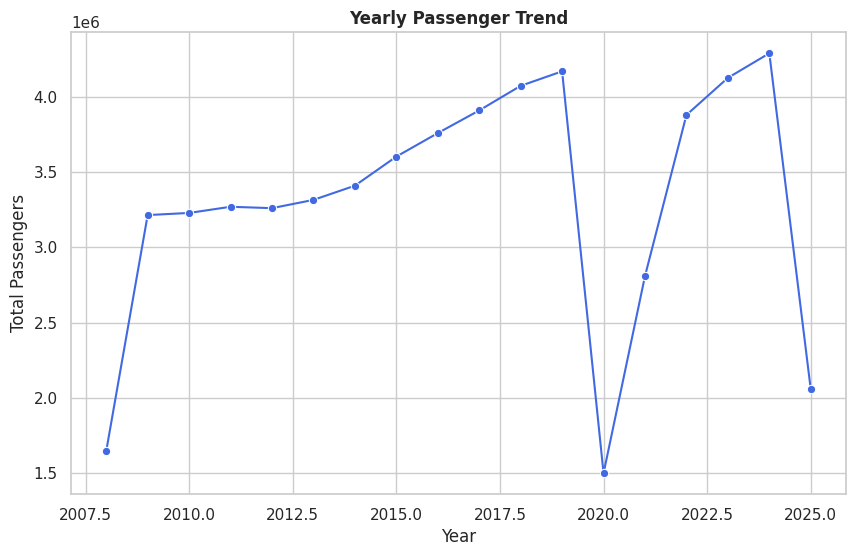

In [15]:
yearly_passengers = df.groupby('year')['passengers'].sum().reset_index()

plt.figure()
sns.lineplot(data=yearly_passengers, x='year', y='passengers',
             marker='o', color='royalblue')

plt.title("Yearly Passenger Trend", fontweight='bold')
plt.xlabel("Year")
plt.ylabel("Total Passengers")
plt.show()

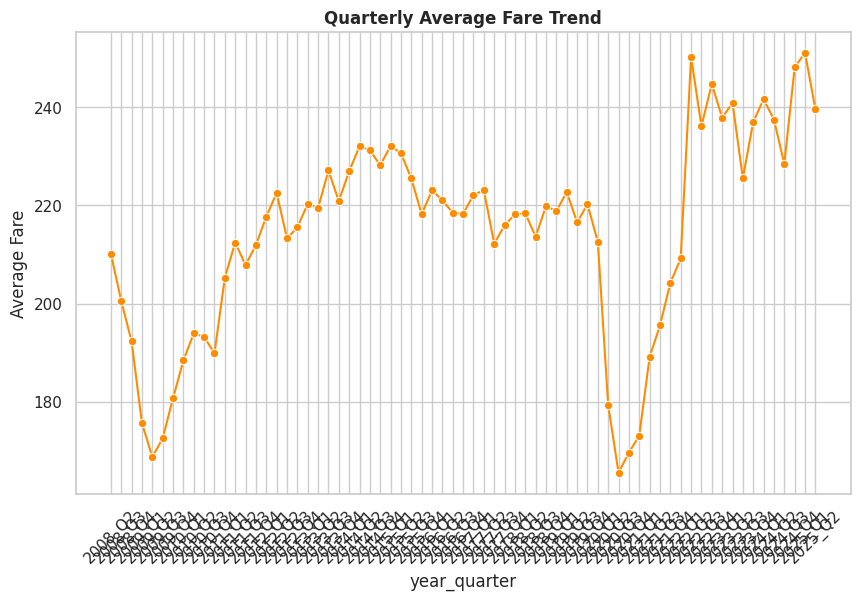

In [16]:
quarter_fare = df.groupby('year_quarter')['avg_fare'].mean().reset_index()

plt.figure()
sns.lineplot(data=quarter_fare, x='year_quarter', y='avg_fare',
             marker='o', color='darkorange')

plt.xticks(rotation=45)
plt.title("Quarterly Average Fare Trend", fontweight='bold')
plt.ylabel("Average Fare")
plt.show()

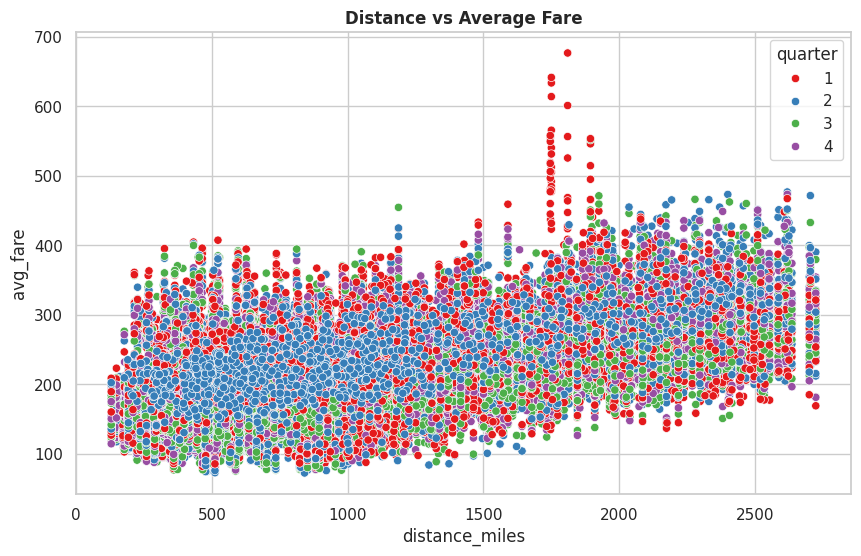

In [17]:
plt.figure()
sns.scatterplot(data=df,
                x='distance_miles',
                y='avg_fare',
                hue='quarter',
                palette='Set1')

plt.title("Distance vs Average Fare", fontweight='bold')
plt.show()

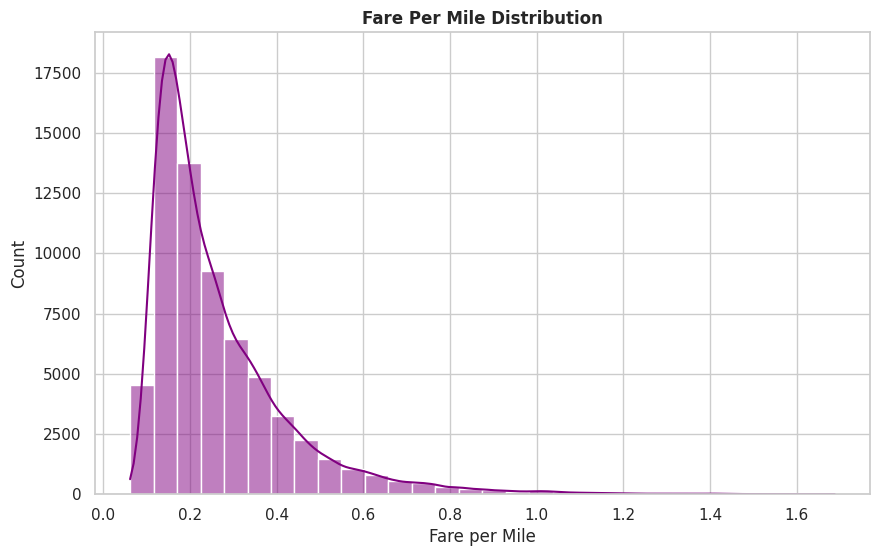

In [18]:
plt.figure()
sns.histplot(df['fare_per_mile'], bins=30,
             kde=True, color='purple')

plt.title("Fare Per Mile Distribution", fontweight='bold')
plt.xlabel("Fare per Mile")
plt.show()

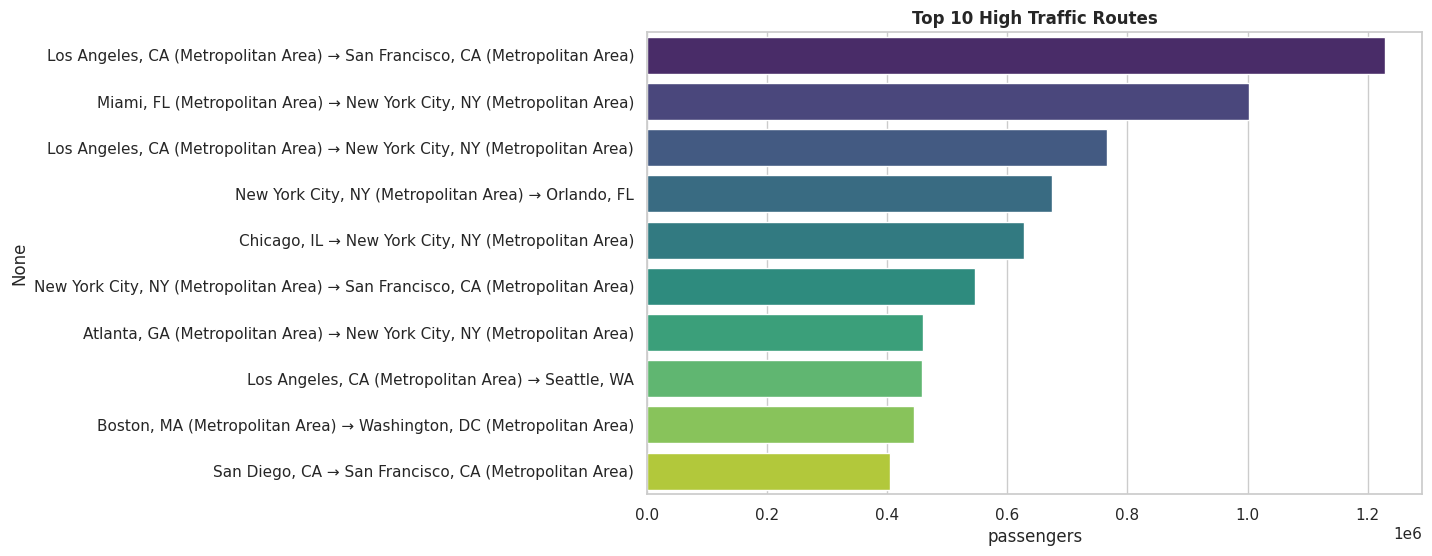

In [19]:
top_routes = (
    df.groupby(['origin_city','destination_city'])['passengers']
      .sum()
      .sort_values(ascending=False)
      .head(10)
      .reset_index()
)

plt.figure()
sns.barplot(data=top_routes,
            x='passengers',
            y=top_routes['origin_city'] + " → " + top_routes['destination_city'],
            palette='viridis')

plt.title("Top 10 High Traffic Routes", fontweight='bold')
plt.show()

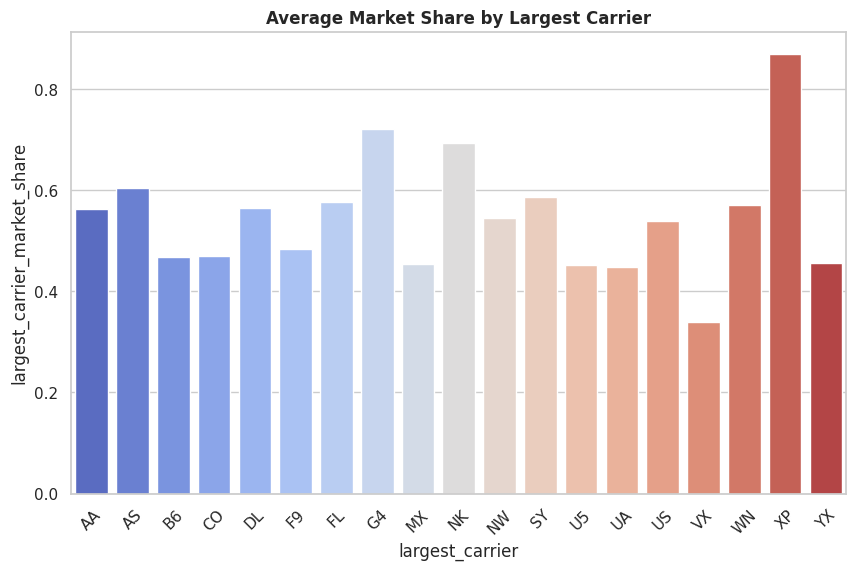

In [20]:
carrier_share = df.groupby('largest_carrier')['largest_carrier_market_share'].mean().reset_index()

plt.figure()
sns.barplot(data=carrier_share,
            x='largest_carrier',
            y='largest_carrier_market_share',
            palette='coolwarm')

plt.xticks(rotation=45)
plt.title("Average Market Share by Largest Carrier", fontweight='bold')
plt.show()

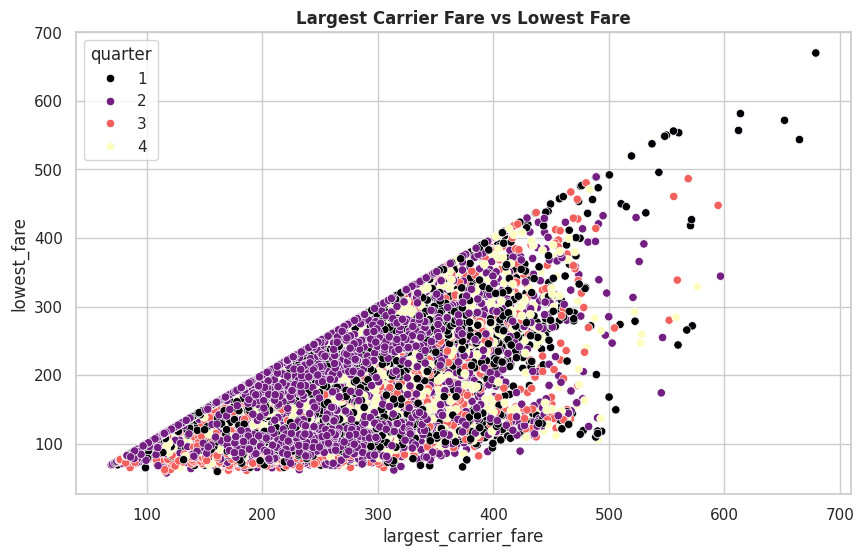

In [21]:
plt.figure()
sns.scatterplot(data=df,
                x='largest_carrier_fare',
                y='lowest_fare',
                hue='quarter',
                palette='magma')

plt.title("Largest Carrier Fare vs Lowest Fare", fontweight='bold')
plt.show()

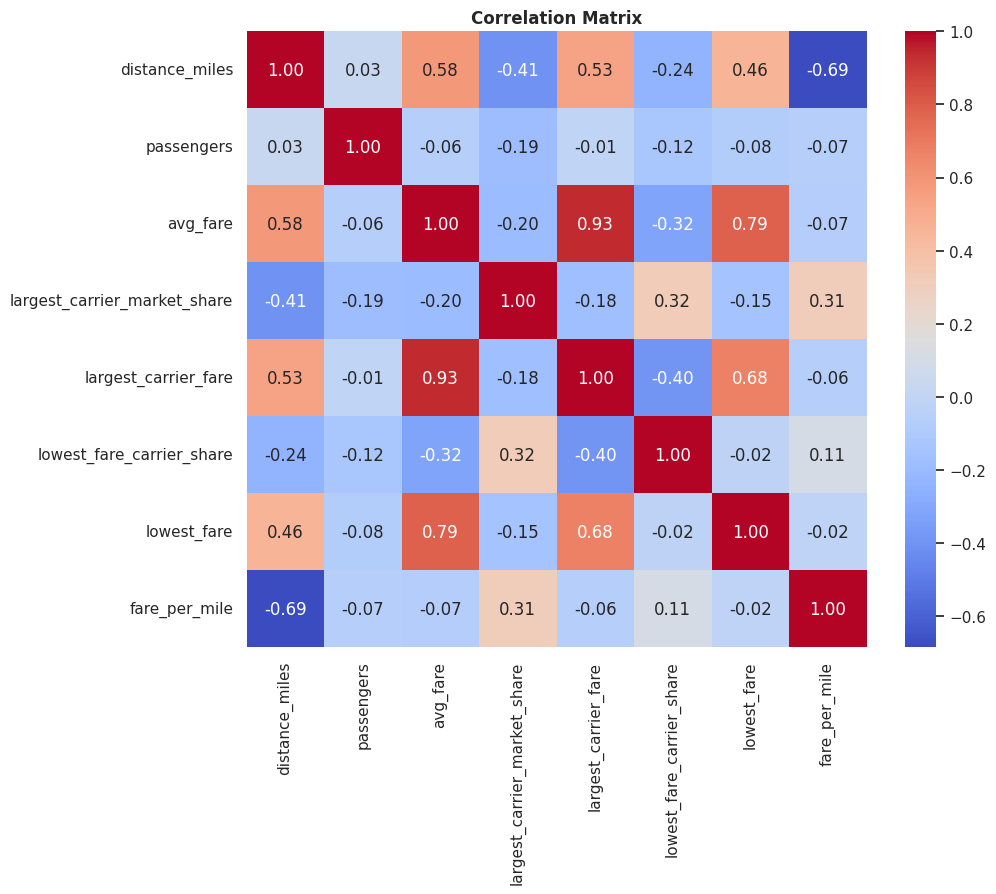

In [22]:
numeric_cols = [
    'distance_miles','passengers','avg_fare',
    'largest_carrier_market_share',
    'largest_carrier_fare',
    'lowest_fare_carrier_share',
    'lowest_fare',
    'fare_per_mile'
]

plt.figure(figsize=(10,8))
sns.heatmap(df[numeric_cols].corr(),
            annot=True,
            cmap='coolwarm',
            fmt=".2f")

plt.title("Correlation Matrix", fontweight='bold')
plt.show()

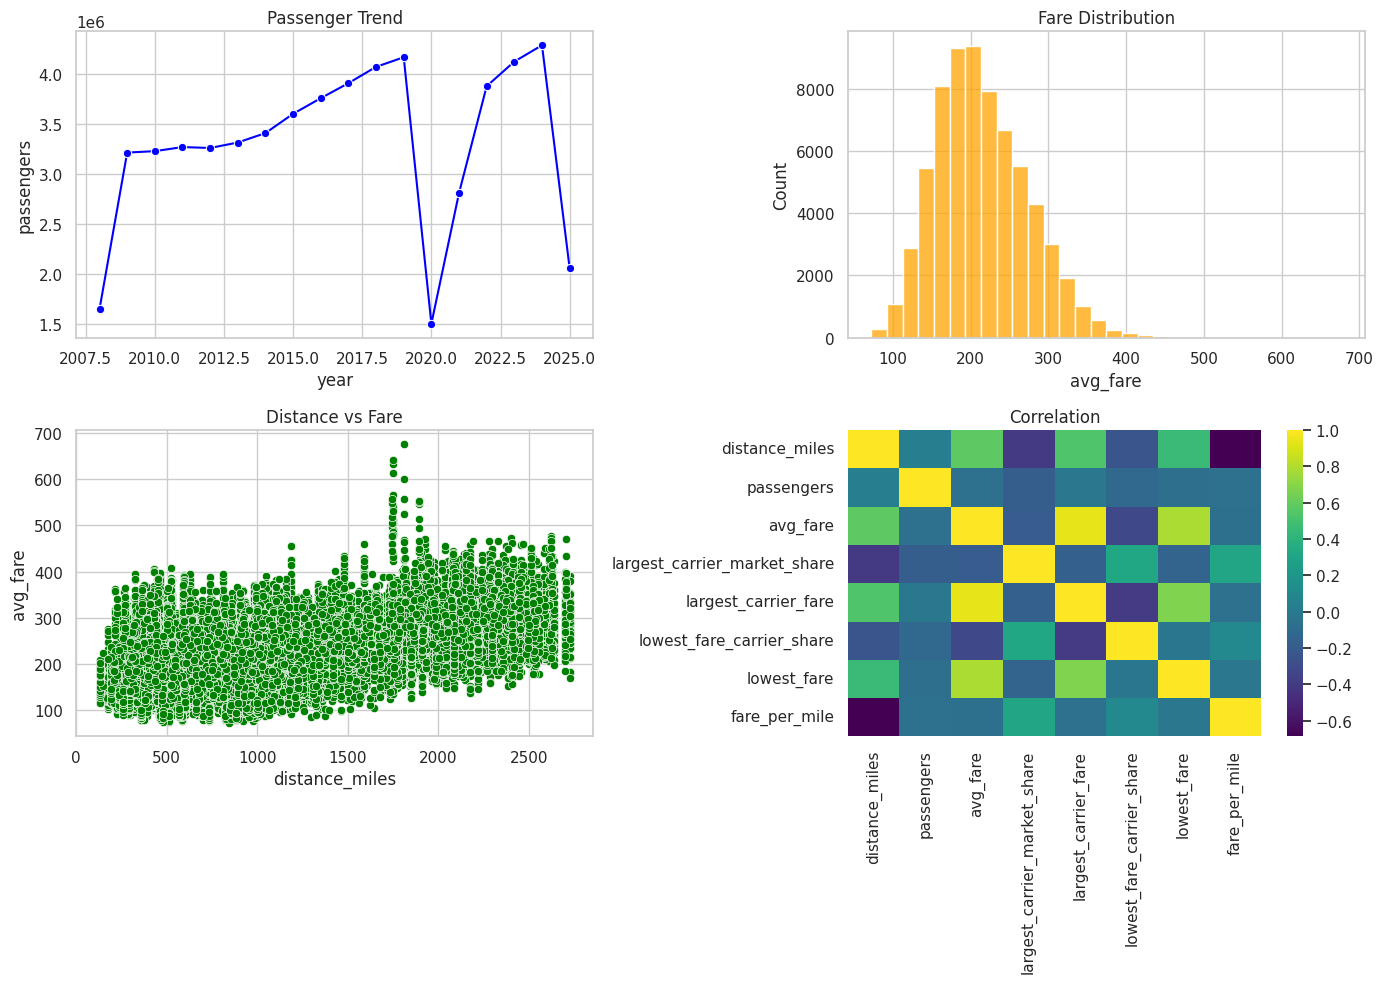

In [23]:
fig, axes = plt.subplots(2,2, figsize=(14,10))

# Passenger trend
sns.lineplot(data=yearly_passengers,
             x='year', y='passengers',
             marker='o', color='blue', ax=axes[0,0])
axes[0,0].set_title("Passenger Trend")

# Fare distribution
sns.histplot(df['avg_fare'], bins=30,
             color='orange', ax=axes[0,1])
axes[0,1].set_title("Fare Distribution")

# Distance vs Fare
sns.scatterplot(data=df,
                x='distance_miles',
                y='avg_fare',
                color='green', ax=axes[1,0])
axes[1,0].set_title("Distance vs Fare")

# Correlation
sns.heatmap(df[numeric_cols].corr(),
            cmap='viridis', ax=axes[1,1])
axes[1,1].set_title("Correlation")

plt.tight_layout()
plt.show()

## Feature engg

In [24]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

In [25]:
df.columns = df.columns.str.strip()

# Create binary target
median_fare = df['avg_fare'].median()
df['High_Fare'] = np.where(df['avg_fare'] > median_fare, 1, 0)

# Define features & target
X = df.drop(['avg_fare', 'High_Fare'], axis=1)
y = df['High_Fare']

In [26]:
categorical_cols = [
    'origin_city','destination_city',
    'largest_carrier','lowest_fare_carrier',
    'year_quarter'
]

numeric_cols = [
    'year','quarter','distance_miles','passengers',
    'largest_carrier_market_share',
    'largest_carrier_fare',
    'lowest_fare_carrier_share',
    'lowest_fare',
    'fare_per_mile'
]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [28]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

In [29]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier()
}

In [30]:
results = {}

for name, model in models.items():
    
    pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('classifier', model)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    
    print(f"\n{name}")
    print("Accuracy:", acc)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))


Logistic Regression
Accuracy: 0.9439259204821048
Confusion Matrix:
 [[6463  341]
 [ 422 6381]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94      6804
           1       0.95      0.94      0.94      6803

    accuracy                           0.94     13607
   macro avg       0.94      0.94      0.94     13607
weighted avg       0.94      0.94      0.94     13607


Decision Tree
Accuracy: 0.952597927537297
Confusion Matrix:
 [[6484  320]
 [ 325 6478]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      6804
           1       0.95      0.95      0.95      6803

    accuracy                           0.95     13607
   macro avg       0.95      0.95      0.95     13607
weighted avg       0.95      0.95      0.95     13607


Random Forest
Accuracy: 0.9664143455574337
Confusion Matrix:
 [[6594  210]
 [ 247 6556]]
Classification Report:


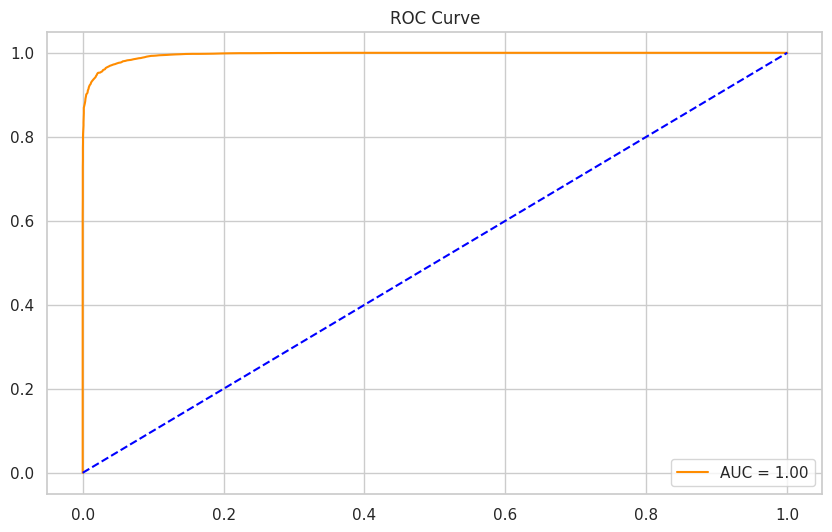

In [31]:
rf_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier())
])

rf_pipeline.fit(X_train, y_train)
y_prob = rf_pipeline.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color='darkorange')
plt.plot([0,1],[0,1],'--',color='blue')
plt.title("ROC Curve")
plt.legend()
plt.show()

In [32]:
cv_scores = cross_val_score(rf_pipeline, X, y, cv=5)
print("CV Accuracy:", cv_scores.mean())

CV Accuracy: 0.8130521055339163


In [33]:
param_grid = {
    'classifier__n_estimators': [100,200],
    'classifier__max_depth': [None,10,20]
}

grid = GridSearchCV(rf_pipeline, param_grid, cv=3)
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best Score:", grid.best_score_)

Best Params: {'classifier__max_depth': None, 'classifier__n_estimators': 200}
Best Score: 0.9653670664773234


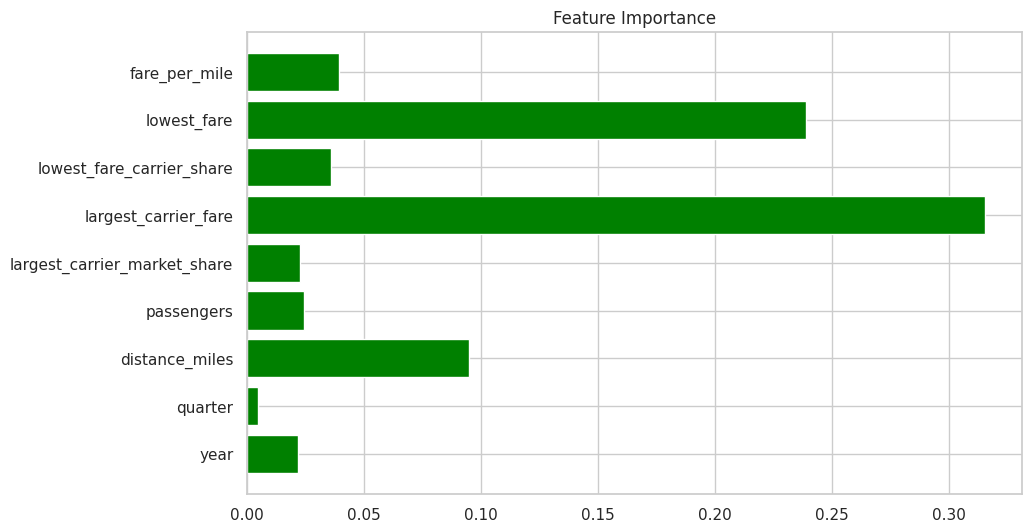

In [34]:
best_model = grid.best_estimator_
importances = best_model.named_steps['classifier'].feature_importances_

feature_names = numeric_cols
plt.barh(feature_names, importances[:len(feature_names)], color='green')
plt.title("Feature Importance")
plt.show()

In [35]:
def predict_route(data_dict):
    input_df = pd.DataFrame([data_dict])
    prediction = best_model.predict(input_df)
    return "High Fare Route" if prediction[0]==1 else "Low Fare Route"

## Thank you..pls upvote!!!!